# 2A.ml - Bayesian models with Python

Modèles de mélanges de lois. Statistiques bayésiennes. *bayespy*, *scikit-learn*.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

You can read [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb). Results might be different between examples. The example used is the same but the default parameters the optimisation uses are different.

We try different python model to deal with a Bayesian problem: a Gaussian Mixture. We will use the following example.

In [3]:
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

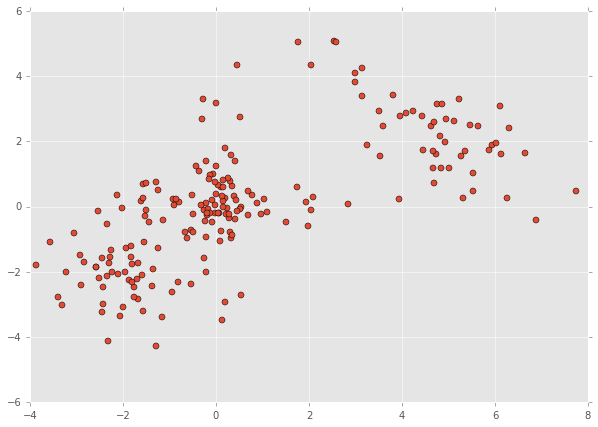

In [5]:
import numpy as np
y0 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.1]], size=50)
y1 = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 2]], size=50)
y2 = np.random.multivariate_normal([5, 2], [[2, -1.5], [-1.5, 2]], size=50)
y3 = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], size=50)
y = np.vstack([y0, y1, y2, y3])
X=y

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot("111")
ax.plot(y[:,0], y[:,1], "o")

<h3 id="bayespy">bayespy</h3>

The module [bayespy](http://www.bayespy.org/) allows to build and estimate simple bayesian models. I just replicate the example on the [Gaussian mixture model](http://www.bayespy.org/examples/gmm.html).

We define the model:

In [7]:
N = 200  # number of data vectors
D = 2    # dimension
K = 10   # maximum number of clusters

In [8]:
from bayespy.nodes import Dirichlet, Categorical, Gaussian, Wishart, Mixture
alpha = Dirichlet(1e-5*np.ones(K), name='alpha')
Z = Categorical(alpha,plates=(N,), name='z')
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D), plates=(K,), name='mu')
sigma = Wishart(D, 1e-5*np.identity(D), plates=(K,), name='Lambda')
Y = Mixture(Z, Gaussian, mu, sigma, name='Y')

In [9]:
Z.initialize_from_random()

In [10]:
from bayespy.inference import VB
Q = VB(Y, mu, sigma, Z, alpha)

In [11]:
Y.observe(y)

In [12]:
Q.update(repeat=1000)

Iteration 1: loglike=-1.487636e+03 (0.013 seconds)
Iteration 2: loglike=-1.350598e+03 (0.013 seconds)
Iteration 3: loglike=-1.337548e+03 (0.011 seconds)
Iteration 4: loglike=-1.328510e+03 (0.012 seconds)
Iteration 5: loglike=-1.322557e+03 (0.013 seconds)
Iteration 6: loglike=-1.317863e+03 (0.016 seconds)
Iteration 7: loglike=-1.313479e+03 (0.013 seconds)
Iteration 8: loglike=-1.309050e+03 (0.010 seconds)
Iteration 9: loglike=-1.304587e+03 (0.011 seconds)
Iteration 10: loglike=-1.299751e+03 (0.011 seconds)
Iteration 11: loglike=-1.293313e+03 (0.010 seconds)
Iteration 12: loglike=-1.283418e+03 (0.010 seconds)
Iteration 13: loglike=-1.269973e+03 (0.010 seconds)
Iteration 14: loglike=-1.257880e+03 (0.014 seconds)
Iteration 15: loglike=-1.243859e+03 (0.016 seconds)
Iteration 16: loglike=-1.215105e+03 (0.016 seconds)
Iteration 17: loglike=-1.154356e+03 (0.013 seconds)
Iteration 18: loglike=-1.147277e+03 (0.012 seconds)
Iteration 19: loglike=-1.130168e+03 (0.011 seconds)
Iteration 20: loglike

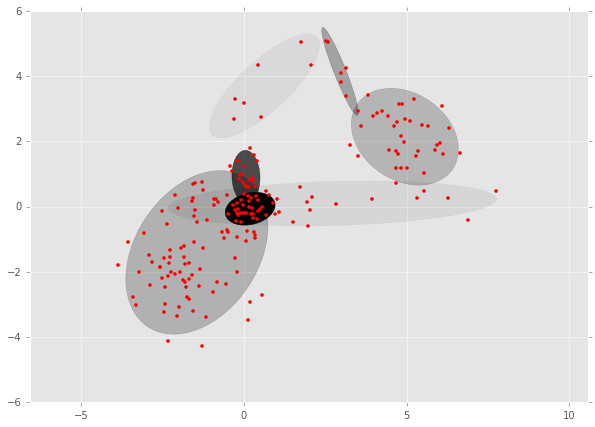

In [13]:
import bayespy.plot as bpplt
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot("111")
bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=2, color="black", fill=True, axes=ax)

We get the result of the optimization:

In [14]:
from bayespy.inference.vmp.nodes.gaussian import GaussianWishartMoments
parent = Y.parents[1]
(mu, _, sigma, _) = parent.get_moments()
mu, sigma

(array([[ -8.93542552e+00,   1.32584771e+01],
        [  8.80005150e+00,   6.39408120e+00],
        [ -9.78558313e-01,  -6.16726644e-01],
        [  0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  4.62480035e+02,   1.89474820e+02],
        [  1.82472862e+00,   5.61687224e+00],
        [  0.00000000e+00,   0.00000000e+00],
        [  4.24502340e-01,   1.43113257e-01],
        [  1.56374250e+00,  -1.62142196e+00]]),
 array([[[  3.64436310e+00,  -3.03258197e+00],
         [ -3.03258197e+00,   4.09446061e+00]],
 
        [[  1.58279132e+00,   4.52277148e-01],
         [  4.52277148e-01,   1.93840384e+00]],
 
        [[  9.38086466e-01,  -2.65479579e-01],
         [ -2.65479579e-01,   7.08703982e-01]],
 
        [[  2.00000000e+05,   0.00000000e+00],
         [  0.00000000e+00,   2.00000000e+05]],
 
        [[  2.00000000e+05,   0.00000000e+00],
         [  0.00000000e+00,   2.00000000e+05]],
 
        [[  1.01153614e+02,   3.94490125e+01],
      

In [16]:
import numpy as np
mu2 = np.linalg.solve(sigma, mu)
mu2

array([[ 0.63258992,  3.70668065],
       [ 4.94708849,  2.14435509],
       [-1.44231845, -1.41050815],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.9534232 ,  4.15043612],
       [ 0.06525418,  0.91533604],
       [ 0.        ,  0.        ],
       [ 2.71795693,  0.09168268],
       [ 0.19462806, -0.06934958]])

The way you can build your model is quite nice but it still needs some development. scikit-learn proposes a better interface.

<h3 id="scikit">scikit-learn</h3>

We try to solve the same problem with another module: [scikit-learn](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#example-mixture-plot-gmm-py).

In [18]:
from sklearn import mixture
gmm = mixture.GMM(n_components=10, covariance_type='full')
gmm.fit(X)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [20]:
dpgmm = mixture.DPGMM(n_components=10, covariance_type='full')
dpgmm.fit(X)

DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=10, n_iter=10, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=0)

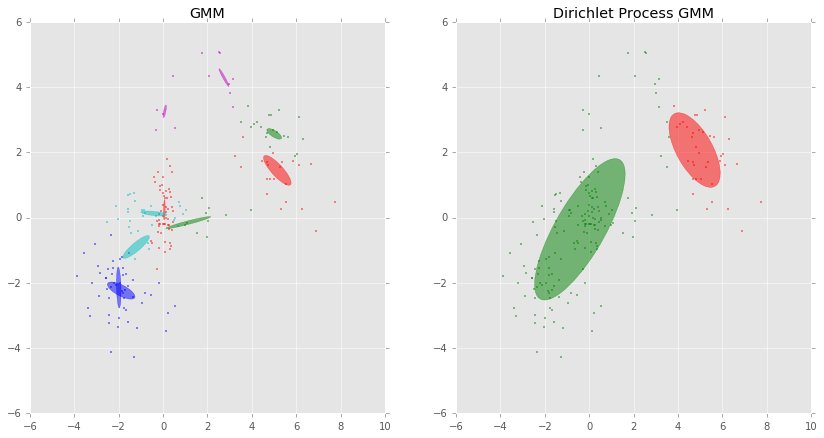

In [22]:
import itertools
import matplotlib as mpl
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
f, axarr = plt.subplots(1, 2, figsize=(14,7))

for i, (clf, title) in enumerate([(gmm, 'GMM'),
                                  (dpgmm, 'Dirichlet Process GMM')]):
    splot = axarr[i]
    Y_ = clf.predict(X)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = np.linalg.eigh(covar)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        splot.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        splot.set_title(title)